# Analisis de Resultados: Encuesta de Uso de Servicios de Streaming de Musica

/tmp/ipykernel_80/1334173813.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_counts = df.groupby(['decada', 'Primary streaming service']).size().unstack().fillna(0)


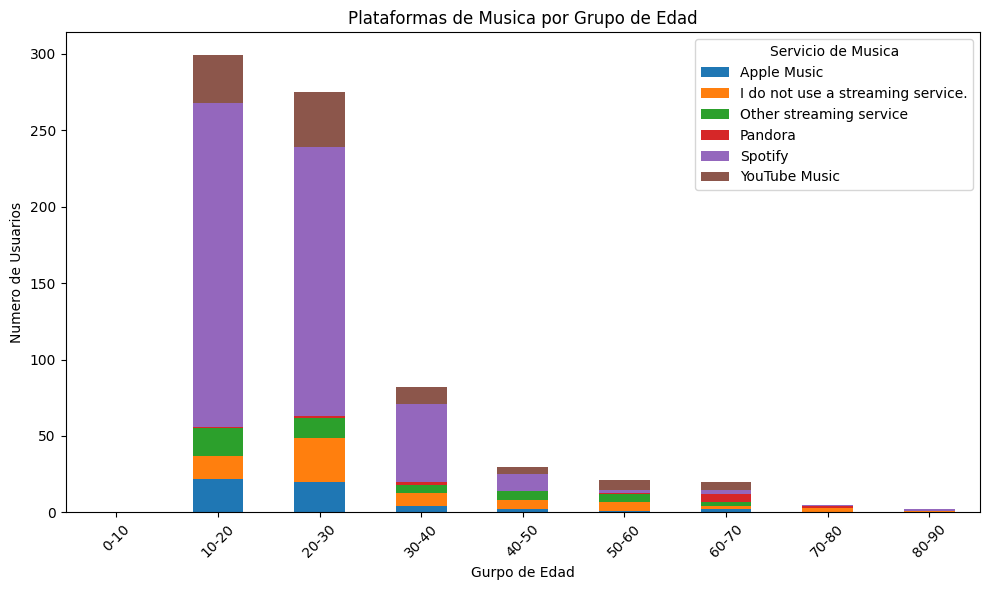

In [3]:
from imports import *
import matplotlib.pyplot as plt

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90"]
df['decada'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

platform_counts = df.groupby(['decada', 'Primary streaming service']).size().unstack().fillna(0)

platform_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Plataformas de Musica por Grupo de Edad')
plt.xlabel('Gurpo de Edad')
plt.ylabel('Numero de Usuarios')
plt.xticks(rotation=45)
plt.legend(title='Servicio de Musica')
plt.tight_layout()

plt.show()